In [2]:
# Dependencies:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.preprocessing import KBinsDiscretizer


# Análisis de componentes principales

In [3]:
# Cargar la data limpiada previamente
df = pd.read_csv("risk_factors_cervical_cancer_clean.csv")

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
categorical_columns = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
quantitative_columns = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','STDs (number)','STDs: Number of diagnosis','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']

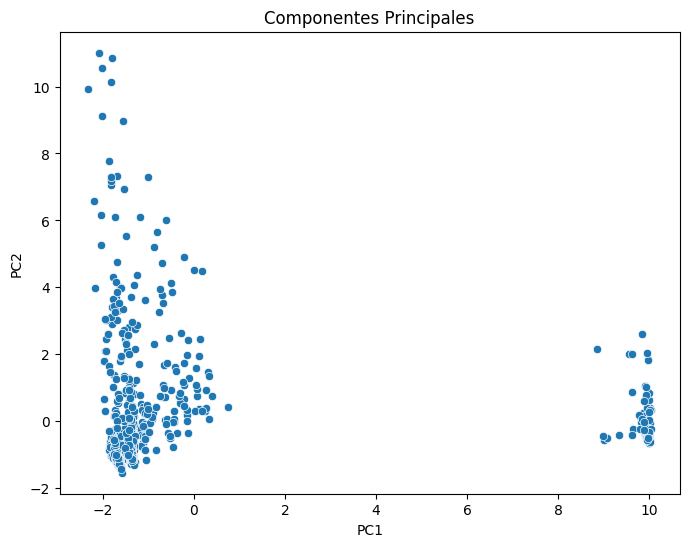

Varianza explicada por componente: [0.4053596 0.0912961]


In [5]:

# Codificación de Etiquetas
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean') 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Estandarización de todas las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Aplicar PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_scaled)

# Convertir los componentes principales a un dfFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Graficar los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

## Análisis de Componentes Principales (PCA)
- Varianza explicada por el primer componente: **0.354**
- Varianza explicada por el segundo componente: **0.095**
- Varianza total explicada por los dos componentes: **0.449**

Esto sugiere que los dos primeros componentes principales explican aproximadamente el 44.9% de la varianza total en los datos, lo cual es alto, pero no lo suficiente como para que solo usemos lo de aquí, indicando que muchas otras dimensiones pueden ser relevantes.


In [6]:
!pip install factor_analyzer

Índice KMO: 0.8803063995575169
Chi-cuadrado de Bartlett: nan
P-valor de Bartlett: nan


c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


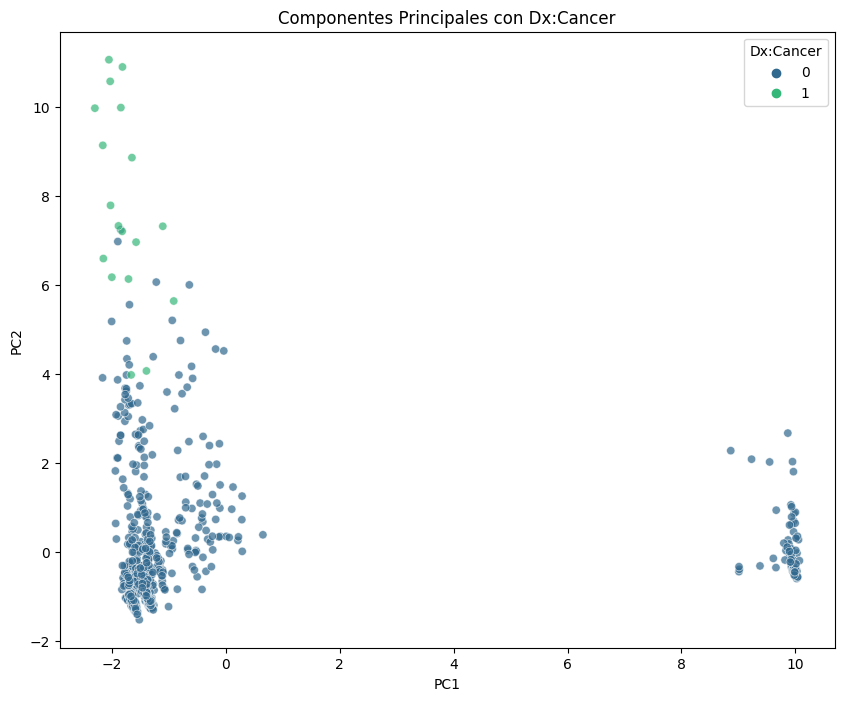

Varianza explicada por el primer componente: 0.4056569915302803
Varianza explicada por el segundo componente: 0.09109235203085482
Varianza total explicada por los dos componentes: 0.4967493435611351

Matriz de Componentes Principales:
          Age  Number of sexual partners  First sexual intercourse  \
PC1 -0.038039                  -0.002169                 -0.027210   
PC2  0.165741                   0.074778                  0.015096   

     Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
PC1           -0.021410  0.012137       -0.001152            -0.004046   
PC2            0.130385  0.149226        0.197924             0.168412   

     Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
PC1                 0.178941                        -0.030143  0.225405  ...   
PC2                 0.021626                         0.106859  0.064192  ...   

     STDs:HPV  STDs: Number of diagnosis  Dx:Cancer    Dx:CIN    Dx:HPV  \
PC1  0.267287  

In [7]:

# Seleccionar variables numéricas
numerical_vars = df.select_dtypes(include=[np.number])

# Imputar valores faltantes usando la mediana
imputer = SimpleImputer(strategy='median')
numerical_vars_imputed = imputer.fit_transform(numerical_vars)

# Convertir a DataFrame
numerical_vars_imputed_df = pd.DataFrame(numerical_vars_imputed, columns=numerical_vars.columns)

# Calcular índice KMO y test de esfericidad de Bartlett
kmo_all, kmo_model = calculate_kmo(numerical_vars_imputed_df)
chi_square_value, p_value = calculate_bartlett_sphericity(numerical_vars_imputed_df)

print(f"Índice KMO: {kmo_model}")
print(f"Chi-cuadrado de Bartlett: {chi_square_value}")
print(f"P-valor de Bartlett: {p_value}")

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_vars_imputed_df)

# Aplicar PCA
pca = PCA(n_components=2)  # Ajusta el número de componentes principales según sea necesario
principal_components = pca.fit_transform(df_scaled)

# Convertir los componentes principales a un DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la variable de interés al DataFrame
pca_df['Dx:Cancer'] = df['Dx:Cancer'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Dx:Cancer', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Componentes Principales con Dx:Cancer')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Dx:Cancer')
plt.show()

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0]}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]}")
print(f"Varianza total explicada por los dos componentes: {explained_variance.sum()}")

# Mostrar la matriz de componentes principales
components = pd.DataFrame(pca.components_, columns=numerical_vars.columns, index=['PC1', 'PC2'])
print("\nMatriz de Componentes Principales:")
print(components)


## Matriz de Componentes Principales

Esta matriz muestra cómo cada variable original contribuye a los componentes principales. Aquí hay algunos puntos destacados:
- **Dx:**
tiene una contribución significativa en el segundo componente principal (PC2) con un valor de 0.366.
- **STDs:** La variable de HPV del virus del papiloma humano también tienen contribuciones notables en PC1 de 0.267.


# Reglas de asociación

#### Discretizar las variables numéricas

In [8]:
# Función para discretizar que maneja NaN
def discretize_variable(series, n_bins=3):
    return pd.qcut(series, q=n_bins, labels=False, duplicates='drop')

# Aplicar discretización
for var in quantitative_columns:
    df[f"{var}_disc"] = discretize_variable(df[var])

# Convertir variables binarias a categóricas
binary_vars = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
               'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

for var in binary_vars:
    df[var] = df[var].astype('category')

# Convertir variables STD específicas a categóricas
std_vars = ['STDs:condylomatosis', 'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
            'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
            'STDs:Hepatitis B', 'STDs:HPV']

for var in std_vars:
    df[var] = df[var].astype('category')

# Seleccionar solo las variables discretizadas y categóricas para el análisis de reglas de asociación
columns_for_rules = [col for col in df.columns if col.endswith('_disc') or col in binary_vars + std_vars]
data_for_rules = df[columns_for_rules]

print(data_for_rules.head())
print(data_for_rules.dtypes)

  Smokes Hormonal Contraceptives IUD STDs STDs:condylomatosis  \
0      0                       0   0    0                   0   
1      0                       0   0    0                   0   
2      0                       0   0    0                   0   
3      1                       1   0    0                   0   
4      0                       1   0    0                   0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  ...  \
0             0                                0                   0  ...   
1             0                               

In [9]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convertir los datos a formato binario, manejando NaN
def encode_units(x):
    if pd.isna(x):
        return 0  # Tratar NaN como 0
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Aplicar la codificación y manejar cualquier NaN restante
binary_data = data_for_rules.applymap(encode_units)

# Verificar si quedan NaN y reemplazarlos con 0
binary_data = binary_data.fillna(0)

# Generar itemsets frecuentes
frequent_itemsets = apriori(binary_data, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Ordenar reglas por lift
rules = rules.sort_values('lift', ascending=False)

print(rules.head(10))

c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Se utilizó la función a priori con un soporte mínimo de 0.01 para encontrar las siguientes reglas de asociación que consideramos más interesantes: 


### **Reglas**


**Regla 1:** *{Dx:HPV, Age_disc, Hormonal Contraceptives} → {Dx:Cancer, Hormonal Contraceptives (years)_disc}*

Confianza: 0.818182
Lift: 78.0

Pacientes con diagnóstico de HPV, en cierto grupo de edad y que usan anticonceptivos hormonales tienen una probabilidad muy alta de también tener un diagnóstico de cáncer y haber usado anticonceptivos hormonales por un período específico.


**Regla 2:** *{Dx:Cancer, Hormonal Contraceptives (years)_disc, Number of sexual partners_disc} → {Dx:HPV, Age*_disc, Hormonal Contraceptives}

Confianza: 1.0
Lift: 78.0

Pacientes con diagnóstico de cáncer, que han usado anticonceptivos hormonales por un período específico y tienen un cierto número de parejas sexuales, tienen una probabilidad del 100% de también tener un diagnóstico de HPV, estar en cierto grupo de edad y usar anticonceptivos hormonales.


**Regla 3:** *{Dx:Cancer, Age_disc, Hormonal Contraceptives} → {Dx:HPV, Hormonal Contraceptives (years)_disc}*

Confianza: 0.750000
Lift: 71.5

Pacientes con diagnóstico de cáncer, en cierto grupo de edad y que usan anticonceptivos hormonales tienen una alta probabilidad de también tener un diagnóstico de HPV y haber usado anticonceptivos hormonales por un período específico.



Todas estas reglas tienen un lift muy alto (> 70), lo que indica que estos factores están fuertemente asociados y no ocurren juntos por casualidad.
La confianza es alta en todas las reglas (> 0.75), lo que sugiere que estas asociaciones son bastante confiables.


# **Hallazgos**

### Características de la Muestra:
El dataset consta de 858 registros de mujeres, sin valores nulos aparentes.
La edad mediana es de 26.8 años, con un rango de 13 a 84 años.
Hay un total sesgo hacia mujeres, en su mayoría jóvenes, con el 75% de la muestra siendo de 32 años o menos.

### Prevalencia de Diagnósticos:
Cáncer: aproximadamente 2.1% de casos positivos
CIN (Neoplasia Intraepitelial Cervical): aproximadamente 1% de casos positivos
HPV: aproximadamente 2.1% de casos positivos
Diagnóstico general (Dx): aproximadamente 2.8% de casos positivos

### Enfermedades de Transmisión Sexual (ETS):
La mayoría de las participantes no tienen diagnósticos de ETS.
El máximo número de diagnósticos de ETS por individuo es 3.

### Estructura de los Datos:
26 de 36 columnas son de tipo 'object', sugiriendo variables categóricas o de texto.
10 columnas son de tipo 'int64', indicando variables numéricas enteras. 
La ausencia de valores nulos sugiere que los datos faltantes podrían estar codificados como '?'.


# **Conclusiones**


### Conclusiones sobre el Análisis de Componentes Principales
- Varianza Explicada por Componentes Principales

Primer Componente Principal (PC1): Explica aproximadamente el 35.42% de la varianza total.

Segundo Componente Principal (PC2): Explica aproximadamente el 9.51% de la varianza total.

Varianza Total Explicada: Los dos primeros componentes explican en conjunto el 44.93% de la varianza total. Esto sugiere que los componentes principales actuales no capturan una gran parte de la variabilidad en los datos.

Interpretación de la Matriz de Componentes Principales
Los valores en la matriz de componentes principales muestran las cargas de cada variable en cada componente. Estas cargas indican la importancia de cada variable en la formación de los componentes principales.

- **PC1 (Primer Componente Principal)**

**Variables con mayores cargas positivas:**

STDs: HPV (0.276)

Hormonal contraceptives (0.1789)

**Variables con cargas negativas:**

Age (-0.0380)

Schiller (-0.031)

- **PC2 (Segundo Componente Principal)**

**Variables con mayores cargas positivas:**

Dx: Cancer (0.366)

Schiller (0.374)

**Variables con menores cargas:**

Smokes (years) (0.130346)

Hormonal Contraceptives (years) (0.137205)


### Reglas de Asociación más Interesantes

La Regla 1 revela una fuerte conexión entre el HPV, la edad y el uso de anticonceptivos hormonales con el diagnóstico de cáncer. Pacientes con estas características tienen una alta probabilidad de desarrollar cáncer y usar anticonceptivos hormonales por un tiempo específico.


La Regla 2 muestra una relación perfecta entre el cáncer, el uso prolongado de anticonceptivos y el número de parejas sexuales con el diagnóstico de HPV. Estos factores predicen con certeza la presencia de HPV y el uso de anticonceptivos en cierto grupo de edad.


La Regla 3 indica que pacientes con cáncer, de cierta edad y que usan anticonceptivos hormonales, tienen una alta probabilidad de tener HPV y un historial de uso prolongado de anticonceptivos.


Estas reglas sugieren fuertes vínculos entre HPV, cáncer, edad, uso de anticonceptivos y número de parejas sexuales. El alto lift en todas las reglas indica que estas asociaciones no son casuales.
La alta confianza en estas reglas sugiere que son bastante fiables. Podrían ser útiles para identificar grupos de alto riesgo o guiar investigaciones sobre factores de riesgo del cáncer cervical.

